# Capstone Analysis

Jonathan Marin, Jason Lin, John Santerre

# Import Python Packages

In [139]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel



# Data Preparation

We are preparing two different sets of data.  Gene counts and gene concentration data.  For the gene counts, we only have data for PA.  This is the dataset that was used for the initial study.  For the gene concentration (Data Set 2) we have PA and UAB data which we have to normalize. 

# Data Set 1 - RNA Sequence Count Data

The below code imports the rna sequence count spreadsheet and normalizes the data using the EdgeR package.  Stanford researchers did statistical tests for feature signficance, but we will do something else to choose features.  I will comment out the code for the statistical tests that they did and normalize the entire dataset. 

Also, the data is pivoted in such a way that it isn't useful for machine learning.  We will have to pivot the data for our purposes. 

In [140]:
#python dataframe
rawdata_norm_labels = pd.read_csv('rawdata_norm_labels.csv', nrows = None)

In [141]:
rawdata_norm_labels = rawdata_norm_labels.rename(index=str, columns = {"rawdata$external_gene_name":"Gene_Name"})

In [142]:
rawdata_norm_labels

,Gene_Name,T_Penn_3,T_Penn_6,T_Penn_8,T_Penn_9,T_Penn_14,T_Penn_16,T_Penn_27,PT_Penn_15,PT_Penn_17,PT_Penn_18,PT_Penn_24,PT_Penn_25,PT_Penn_28,PT_Penn_4,PT_Penn_10
0,RP11-460H9.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,C2orf76,0.000000,4.014262,0.000000,2.926681,0.000000,8.746643,0.000000,0.000000,0.000000,2.468740,0.000000,1.218791,0.000000,11.771215,3.025604
2,ACTL10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CEP135,13.864722,41.748323,33.364752,45.363552,21.181704,76.220750,16.504101,46.756871,57.996230,71.593448,11.338254,32.907366,54.647795,23.542429,46.728768
4,AC005609.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,RP11-613M10.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,NDUFB5P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,MIIP,0.000000,12.042786,16.682376,23.413446,30.595794,8.746643,33.008203,3.596682,7.249529,9.874958,11.338254,39.001322,0.000000,0.000000,11.430058
8,RP11-578O24.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,PRSS3P4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [143]:
#transposed_rawdata_norm.set_index('Gene_Name',inplace=True)

transposed_rawdata_norm = rawdata_norm_labels.transpose()

In [144]:
transposed_rawdata_norm

,0,1,2,3,4,5,6,7,8,9,...,59407,59408,59409,59410,59411,59412,59413,59414,59415,59416
Gene_Name,RP11-460H9.1,C2orf76,ACTL10,CEP135,AC005609.2,RP11-613M10.6,NDUFB5P1,MIIP,RP11-578O24.2,PRSS3P4,...,CLN6,RP11-500C11.3,CTBP2P7,ITIH2,RBPMSLP,ABCA8,RNU6-280P,PRAMEF7,RNU6-545P,RNU6-318P
T_Penn_3,0,0,0,13.8647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T_Penn_6,0,4.01426,0,41.7483,0,0,0,12.0428,0,0,...,8.02852,0,0,0,0,0,0,0,0,0
T_Penn_8,0,0,0,33.3648,0,0,0,16.6824,0,0,...,0,0,0,0,0,0,0,0,0,0
T_Penn_9,0,2.92668,0,45.3636,0,0,0,23.4134,0,0,...,0,0,1.46334,0,0,0,0,0,0,0
T_Penn_14,0,0,0,21.1817,0,0,0,30.5958,0,0,...,7.06057,0,0,0,0,0,0,0,0,0
T_Penn_16,0,8.74664,0,76.2208,0,0,0,8.74664,0,0,...,8.74664,0,0,0,0,0,0,0,0,0
T_Penn_27,0,0,0,16.5041,0,0,0,33.0082,0,0,...,0,0,0,0,0,0,0,0,0,0
PT_Penn_15,0,0,0,46.7569,0,0,0,3.59668,0,0,...,0,0,0,0,0,0,0,0,0,0
PT_Penn_17,0,0,0,57.9962,0,0,0,7.24953,0,0,...,16.9156,0,0,0,0,0,0,0,0,0


In [145]:
transposed_rawdata_norm.columns = transposed_rawdata_norm.iloc[0]

In [146]:
transposed_rawdata_norm = transposed_rawdata_norm.drop(transposed_rawdata_norm.index[0])

In [147]:
transposed_rawdata_norm.columns[0]

'RP11-460H9.1'

In [148]:
transposed_rawdata_norm['index'] = transposed_rawdata_norm.index

In [149]:
transposed_rawdata_norm = transposed_rawdata_norm.reset_index(drop = False)

In [150]:
transposed_rawdata_norm.index.names = ['index']

In [151]:
transposed_rawdata_norm =transposed_rawdata_norm.rename(index=str, columns={"level_0": "Patient"})

In [152]:
transposed_rawdata_norm.to_csv('transposed_rawdata_norm.csv', index = False)

In [153]:
transposed_rawdata_norm['preterm_ind'] = np.where(transposed_rawdata_norm['Patient'].str.contains("PT") == True, 1, 0)

In [154]:
transposed_rawdata_norm.reset_index(drop = True)

Gene_Name,Patient,RP11-460H9.1,C2orf76,ACTL10,CEP135,AC005609.2,RP11-613M10.6,NDUFB5P1,MIIP,RP11-578O24.2,...,CTBP2P7,ITIH2,RBPMSLP,ABCA8,RNU6-280P,PRAMEF7,RNU6-545P,RNU6-318P,index,preterm_ind
0,T_Penn_3,0,0,0,13.8647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,T_Penn_3,0
1,T_Penn_6,0,4.01426,0,41.7483,0,0,0,12.0428,0,...,0,0,0,0,0,0,0,0,T_Penn_6,0
2,T_Penn_8,0,0,0,33.3648,0,0,0,16.6824,0,...,0,0,0,0,0,0,0,0,T_Penn_8,0
3,T_Penn_9,0,2.92668,0,45.3636,0,0,0,23.4134,0,...,1.46334,0,0,0,0,0,0,0,T_Penn_9,0
4,T_Penn_14,0,0,0,21.1817,0,0,0,30.5958,0,...,0,0,0,0,0,0,0,0,T_Penn_14,0
5,T_Penn_16,0,8.74664,0,76.2208,0,0,0,8.74664,0,...,0,0,0,0,0,0,0,0,T_Penn_16,0
6,T_Penn_27,0,0,0,16.5041,0,0,0,33.0082,0,...,0,0,0,0,0,0,0,0,T_Penn_27,0
7,PT_Penn_15,0,0,0,46.7569,0,0,0,3.59668,0,...,0,0,0,0,0,0,0,0,PT_Penn_15,1
8,PT_Penn_17,0,0,0,57.9962,0,0,0,7.24953,0,...,0,0,0,0,0,0,0,0,PT_Penn_17,1
9,PT_Penn_18,0,2.46874,0,71.5934,0,0,0,9.87496,0,...,0,2.46874,0,0,0,0,0,0,PT_Penn_18,1


In [109]:
X1 = transposed_rawdata_norm.drop(['preterm_ind','Patient','index'], axis = 1)

Gene_Name,level_0,index,RP11-460H9.1,C2orf76,ACTL10,CEP135,AC005609.2,RP11-613M10.6,NDUFB5P1,MIIP,...,CLN6,RP11-500C11.3,CTBP2P7,ITIH2,RBPMSLP,ABCA8,RNU6-280P,PRAMEF7,RNU6-545P,RNU6-318P
0,0,0,0,0,0,13.8647,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,4.01426,0,41.7483,0,0,0,12.0428,...,8.02852,0,0,0,0,0,0,0,0,0
2,2,2,0,0,0,33.3648,0,0,0,16.6824,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,2.92668,0,45.3636,0,0,0,23.4134,...,0,0,1.46334,0,0,0,0,0,0,0
4,4,4,0,0,0,21.1817,0,0,0,30.5958,...,7.06057,0,0,0,0,0,0,0,0,0
5,5,5,0,8.74664,0,76.2208,0,0,0,8.74664,...,8.74664,0,0,0,0,0,0,0,0,0
6,6,6,0,0,0,16.5041,0,0,0,33.0082,...,0,0,0,0,0,0,0,0,0,0
7,7,7,0,0,0,46.7569,0,0,0,3.59668,...,0,0,0,0,0,0,0,0,0,0
8,8,8,0,0,0,57.9962,0,0,0,7.24953,...,16.9156,0,0,0,0,0,0,0,0,0
9,9,9,0,2.46874,0,71.5934,0,0,0,9.87496,...,4.93748,0,0,2.46874,0,0,0,0,0,0


In [161]:
X1.to_csv('Transformed_X_Data.csv',  header = True, index = False, index_label = None)

In [162]:
X1 = pd.read_csv('Transformed_X_Data.csv')

In [169]:
y1 = transposed_rawdata_norm['preterm_ind']

# Data 1 - RNA Seq Count Data - Feature Importance


In [170]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [171]:
model = ExtraTreesClassifier()

In [172]:
model = model.fit(X1,y1)

In [173]:
sfm = SelectFromModel(model, prefit = True, threshold= '.5*mean')
n_features = sfm.transform(X1).shape[1]
print('Number of feature selected:')
print(n_features)



Number of feature selected:
37


Current size: [20.0, 12.0]


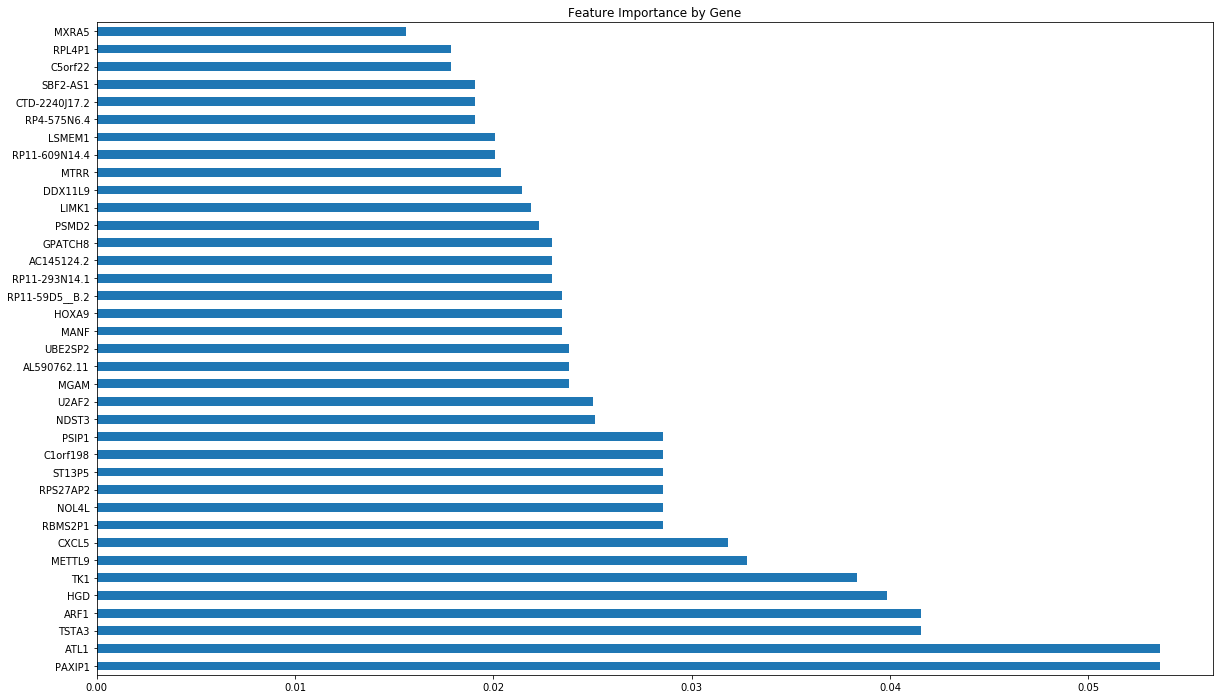

In [174]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

(pd.Series(model.feature_importances_, index=X1.columns)
   .nlargest(n_features)
   .plot(kind='barh', title = 'Feature Importance by Gene'))

In [175]:
ft = list(zip(X1.columns, sfm.get_support()))

selected = [x[0] for x in ft if x[1] == True]

X_selected = X1[selected]

In [176]:
X1 = X_selected

In [177]:
X1.shape

(15, 37)

# Stratified Shuffle Split

In [180]:
from sklearn.model_selection import StratifiedShuffleSplit 

#Train test split that was used before
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)
cv = StratifiedShuffleSplit(n_split = 10, test_size = .2, random_state = 42)


The target in the training data seems to be balanced. 

# Grid Search - Decision Tree - Data 1 - RNA Seq Count Data

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree


dtc = DecisionTreeClassifier(random_state = 1234)

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(dtc, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X1, y1)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))



The best parameters are {'max_depth': 3, 'max_features': 1} with a score of 1.00


# Grid Search - Random Forest - Data 1

In [192]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


rf = RandomForestClassifier(random_state = 1234)

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  'max_features': ['auto','sqrt'],
              'min_samples_leaf': [1,2,3,4],
               'min_samples_split': [2,5,10], 
               'n_estimators': [1,2,3,4,5,6,7,8,9,10]}

grid = GridSearchCV(rf, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X1, y1)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2} with a score of 0.85


In [204]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'weights': ['uniform','distance'],
                'leaf_size': [1,2,3,5,10,20,30,50,100]}

#Create KNN Classifier
knn = KNeighborsClassifier()



grid = GridSearchCV(knn, param_grid = param_grid, cv = cv, scoring = 'accuracy')

grid.fit(X1, y1)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'leaf_size': 1, 'n_neighbors': 4, 'weights': 'uniform'} with a score of 0.80


# Data 2  - Traditional Train/Test Split


In [ ]:
data2 = pd.read_csv("counts_per_ml_PA_UAB.csv")

There are columns with nothing but NaNs.  Going to drop these columns. 

In [ ]:
data2 = data2.dropna(axis =1, how = 'all')

In [ ]:
data2['preterm_ind'] =  np.where(data2['delivery'] >= 37, 0, 1)

In [ ]:
data2 = data2.drop(['sample_number', 'sample_id', 'panel', 'cohort'], axis = 1)  ##don't need sample number nor sample_id

In [ ]:
X2 = data2.drop(['delivery', 'preterm_ind'], axis =1 )

In [ ]:
y2_regressor = data2['delivery']
y2_classifier = data2['preterm_ind']

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X2_normalized = normalize(X2, norm = 'l2')

In [ ]:
X2_normalized = pd.DataFrame(data = X2_normalized, columns = X2.columns)

# Data2 Feature Importance

In [ ]:
model2 = ExtraTreesClassifier()

In [ ]:
model2.fit(X2_normalized,y2_classifier)

In [ ]:
ft = list(zip(X1.columns, sfm.get_support()))

selected = [x[0] for x in ft if x[1] == True]

X_selected = X1[selected]

In [ ]:
X1 = X_selected

In [ ]:
X1.shape

In [ ]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_normalized,y2_classifier, test_size=0.20, random_state=20)

num_cv_iterations = 10
num_instances = len(y2_classifier)
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.3)
                         
print(cv_object)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)
accuracy_score(y_test1, y_pred1)

In [ ]:
from sklearn import tree

tree.plot_tree(clf.fit(X_train2, y_train2))

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)
accuracy_score(y_test2, y_pred2)

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)
accuracy_score(y_test2, y_pred2)

clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X2_train_normalized, y2_train_classifier)
y_pred2 = clf.predict(X2_test_normalized)
accuracy_score(y2_test_classifier, y_pred2)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=10, class_weight=None) # get object
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)
accuracy_score(y_test2, y_pred2)

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred2 = knn.predict(X_test2)

accuracy_score(y_test2, y_pred2)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test2, y_pred2)

# Data 2  Train/Test Split Based on Cohort

In [ ]:
data2 = pd.read_csv("counts_per_ml_PA_UAB.csv")

There are columns with nothing but NaNs.  Going to drop these columns. 

In [ ]:
data2 = data2.dropna(axis =1, how = 'all')

In [ ]:
data2['preterm_ind'] =  np.where(data2['delivery'] >= 37, 0, 1)

In [ ]:
data2 = data2.drop(['sample_number', 'sample_id', 'panel'], axis = 1)  ##don't need sample number nor sample_id

In [ ]:
PENN = ['PT_Penn', 'T_Penn']

In [ ]:
UAB = ['PT_UAB','T_UAB']

In [ ]:
data2_train = data2.loc[data2['cohort'].isin(PENN)]

In [ ]:
data2_test = data2.loc[data2['cohort'].isin(UAB)]

In [ ]:
X2_train = data2_train.drop(['delivery', 'preterm_ind','cohort'], axis =1 )
X2_test =  data2_test.drop(['delivery', 'preterm_ind','cohort'], axis =1 )

In [ ]:
y2_train_regressor = data2_train['delivery']
y2_train_classifier = data2_train['preterm_ind']

y2_test_regressor = data2_test['delivery']
y2_test_classifier = data2_test['preterm_ind']

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X2_train_normalized = normalize(X2_train, norm = 'l2')
X2_test_normalized = normalize(X2_test, norm = 'l2')


In [ ]:
X2_train_normalized

In [ ]:
X2_train_normalized = pd.DataFrame(data = X2_train_normalized, columns = X2_train.columns)
X2_test_normalized = pd.DataFrame(data = X2_test_normalized, columns = X2_test.columns)

# Data2 Feature Importance

In [ ]:
model2 = ExtraTreesClassifier()

In [ ]:
model2.fit(X2_train_normalized,y2_train_regressor)

In [ ]:
sfm = SelectFromModel(model2, prefit = True, threshold= '.7*mean')
n_features = sfm.transform(X2_train_normalized).shape[1]
print('Number of feature selected:')
print(n_features)

In [ ]:
(pd.Series(model2.feature_importances_, index=X2_train_normalized.columns)
   .nlargest(n_features)
   .plot(kind='barh'))

In [ ]:
import matplotlib.pyplot as plt


#plt.scatter(X2_train_normalized['MPO'], y2_train_regressor )

#plt.scatter(X2_train_normalized['MMD'], y2_train_regressor )
#plt.scatter(X2_train_normalized['P2RY12'], y2_train_regressor )

plt.scatter(X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], y2_train_regressor )
print(X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], y2_train_regressor)

#install pymc

# for parameters -50 and upper 50





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  explained_variance_score
import pymc

parms = pymc.Uniform('parms', lower=0, upper=3000)
intercept = pymc.Uniform('intercept',  lower=0, upper=1000)
x = pymc.Normal('x', mu=0, tau=1, value=X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], observed=True)
@pymc.deterministic(plot=False)
def linear_regress(x=x, parms=parms, intercept=intercept):
    return x*parms+intercept

y = pymc.Normal('output', mu=linear_regress, value=y2_train_regressor, observed=True)
model = pymc.Model([x, y, parms, intercept])
mcmc = pymc.MCMC(model)
mcmc.sample(iter=30000, burn=1000, thin=10)
x = np.arange(-0.1,.1,.01)

plt.scatter(X2_train_normalized['MPO']-X2_train_normalized['MMD'] - X2_train_normalized['P2RY12'], y2_train_regressor )

for i in range(len(mcmc.trace('parms')[:])):
    plt.plot(x, mcmc.trace('parms')[:][i]*x+mcmc.trace('intercept')[:][i], 'r', alpha=0.05)
plt.show()

In [ ]:
ft = list(zip(X2_train_normalized.columns, sfm.get_support()))

selected = [x[0] for x in ft if x[1] == True]

X_selected_train = X2_train_normalized[selected]

X_selected_test = X2_test_normalized[selected]

In [ ]:
X2_train_normalized = X_selected_train
X2_test_normalized = X_selected_test

In [ ]:
X2_train_normalized.shape

In [ ]:
X2_test_normalized.shape

In [ ]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split

#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_normalized,y2_classifier, test_size=0.20, random_state=20)




#num_cv_iterations = 10
#num_instances = len(y2_classifier)
#cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
#                        test_size  = 0.3)
                         
#print(cv_object)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X2_train_normalized, y2_train_classifier)
y_pred1 = clf.predict(X2_test_normalized)
accuracy_score(y2_test_classifier, y_pred1)

In [ ]:
y2_test_classifier

In [ ]:
y_pred1

In [ ]:
from sklearn import tree

tree.plot_tree(clf.fit(X2_train_normalized, y2_train_classifier))

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X2_train_normalized, y2_train_classifier)
y_pred2 = clf.predict(X2_test_normalized)
accuracy_score(y2_test_classifier, y_pred2)

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X2_train_normalized, y2_train_classifier)
y_pred2 = clf.predict(X2_test_normalized)
accuracy_score(y2_test_classifier, y_pred2)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X2_train_normalized, y2_train_classifier)
y_pred2 = clf.predict(X2_test_normalized)
accuracy_score(y2_test_classifier, y_pred2)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=10, class_weight=None) # get object
clf.fit(X2_train_normalized, y2_train_classifier)
y_pred2 = clf.predict(X2_test_normalized)
accuracy_score(y2_test_classifier, y_pred2)

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X2_train_normalized, y2_train_classifier)

#Predict the response for test dataset
y_pred2 = knn.predict(X2_test_normalized)

accuracy_score(y2_test_classifier, y_pred2)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y2_test_classifier, y_pred2)

In [ ]:
y2_test_classifier